In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [8]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [9]:
len(X_train)

60000

In [11]:
X_train[0].shape

(28, 28)

In [13]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

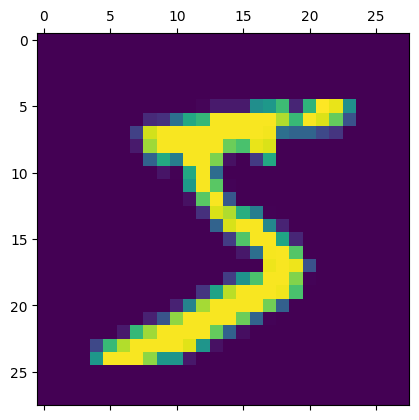

In [16]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [24]:
X_train=X_train/255
X_test=X_test/255

In [25]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [26]:
X_train_flattened.shape

(60000, 784)

In [27]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.9319 - loss: 0.2481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 510us/step - accuracy: 0.9337 - loss: 0.2422
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.9380 - loss: 0.2292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.9358 - loss: 0.2393
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.9335 - loss: 0.2411


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.9168 - loss: 0.3039


[0.2692612409591675, 0.9279000163078308]

In [32]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


array([[2.4977300e-04, 4.7230764e-10, 1.2440990e-03, ..., 9.9982113e-01,
        5.0500631e-02, 6.6048574e-01],
       [1.2938540e-01, 5.7498435e-03, 9.9974900e-01, ..., 1.7978924e-18,
        3.1171151e-02, 4.4939619e-16],
       [5.6533343e-05, 9.9603474e-01, 6.7423183e-01, ..., 5.4608309e-03,
        2.8496650e-01, 2.9901948e-02],
       ...,
       [2.6908899e-07, 1.7583136e-07, 2.7968461e-04, ..., 1.2586401e-01,
        4.8099601e-01, 7.2733474e-01],
       [8.9138928e-07, 6.6418806e-06, 1.3163275e-06, ..., 5.4564030e-06,
        5.0378370e-01, 1.6633616e-06],
       [5.6326644e-05, 2.9336121e-12, 5.0880555e-02, ..., 3.2206475e-15,
        1.0566918e-06, 1.4035720e-10]], dtype=float32)

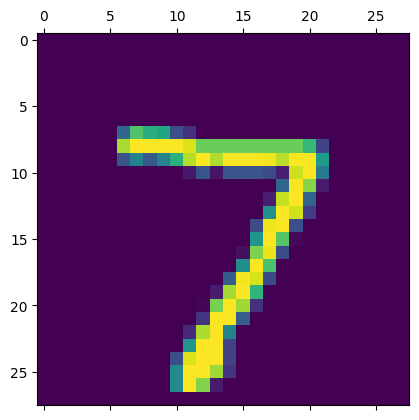

In [33]:
plt.matshow(X_test[0])

In [35]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step


In [37]:
y_predicted[0]

array([2.4977300e-04, 4.7230764e-10, 1.2440990e-03, 9.7131574e-01,
       7.4631098e-04, 1.3297738e-01, 2.8979061e-10, 9.9982113e-01,
       5.0500631e-02, 6.6048574e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [45]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    2,    1,    6,    6,    3,    1,    0],
       [   0, 1119,    3,    2,    0,    1,    3,    2,    5,    0],
       [   5,   10,  935,   17,   10,    4,   10,   10,   27,    4],
       [   3,    0,   14,  931,    2,   24,    2,   10,   17,    7],
       [   1,    2,    6,    3,  926,    0,    6,    4,    8,   26],
       [   9,    2,    2,   34,    9,  788,   13,    6,   26,    3],
       [  10,    3,    9,    1,    8,   15,  909,    1,    2,    0],
       [   1,    7,   22,    5,    6,    1,    0,  949,    2,   35],
       [   7,   15,    6,   27,    9,   35,   10,   10,  844,   11],
       [  11,    8,    1,   12,   31,    6,    0,   20,    3,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

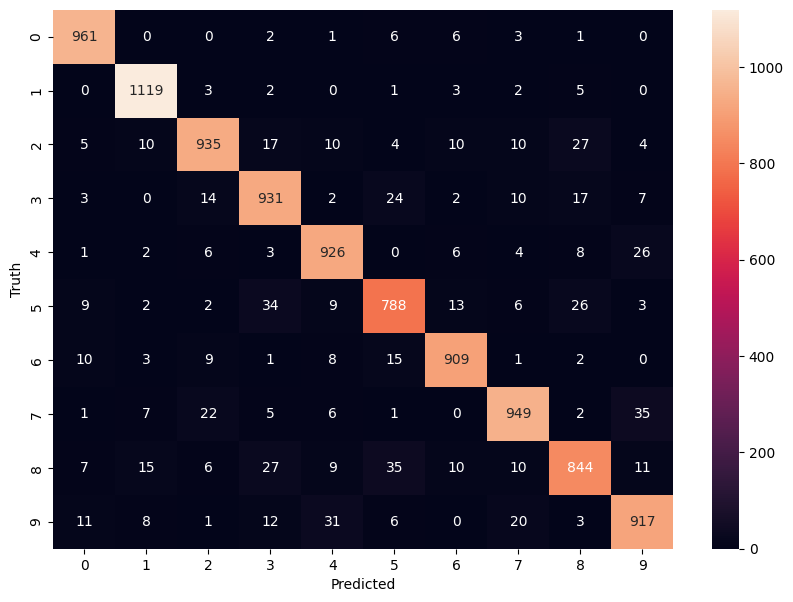

In [47]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Pranav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.8745 - loss: 0.4455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.9629 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9741 - loss: 0.0882
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9794 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 804us/step - accuracy: 0.9841 - loss: 0.0527


In [50]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9708 - loss: 0.0927


[0.07949188351631165, 0.9750000238418579]

In [51]:
y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step


In [52]:
np.argmax(y_predicted[0])

7

In [53]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [54]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    3,    1,    0,    3,    1,    3,    3,    2],
       [   0, 1125,    3,    1,    0,    1,    1,    0,    4,    0],
       [   4,    2, 1008,    5,    2,    0,    2,    4,    5,    0],
       [   0,    0,    4,  982,    0,   17,    0,    3,    2,    2],
       [   0,    0,    7,    0,  953,    2,    2,    3,    2,   13],
       [   2,    0,    0,    6,    1,  879,    1,    1,    1,    1],
       [   4,    3,    5,    1,    7,   12,  922,    0,    4,    0],
       [   1,    5,   12,    1,    1,    1,    0, 1000,    2,    5],
       [   2,    0,    3,    7,    2,    9,    1,    5,  943,    2],
       [   2,    4,    0,    9,    7,    4,    0,    4,    5,  974]])>

Text(95.72222222222221, 0.5, 'Truth')

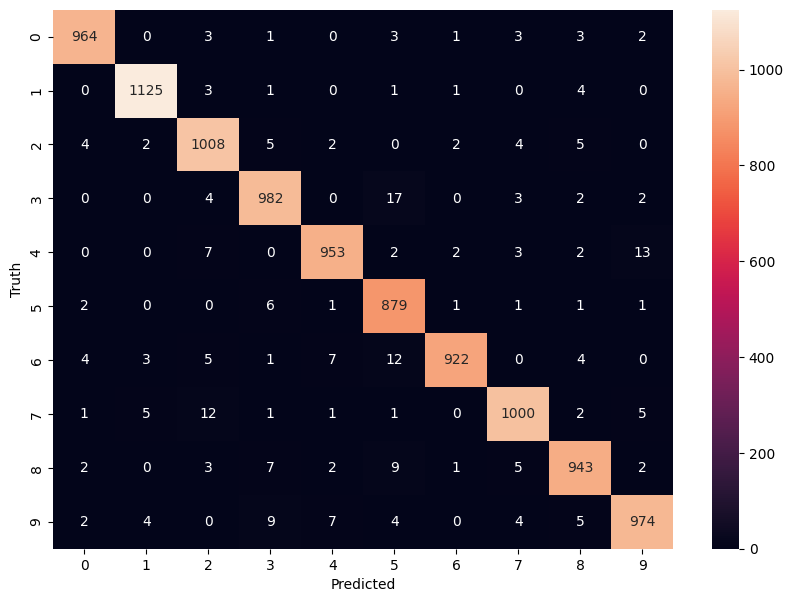

In [55]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train,epochs=5)

Epoch 1/5


C:\Users\Pranav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.8707 - loss: 0.4573
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9609 - loss: 0.1338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.9747 - loss: 0.0851
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9808 - loss: 0.0617
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9846 - loss: 0.0502


In [59]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9740 - loss: 0.0831


[0.07576321065425873, 0.9763000011444092]

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,532 (931.77 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,022 (621.18 KB)

Text(95.72222222222221, 0.5, 'Truth')

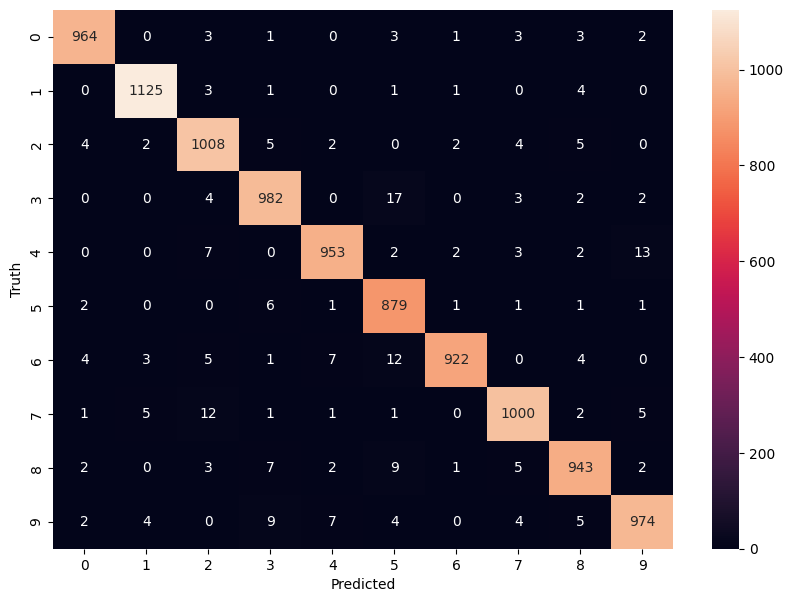

In [60]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [69]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8578 - loss: 0.4900
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.9621 - loss: 0.1253
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9728 - loss: 0.0874
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9811 - loss: 0.0628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9841 - loss: 0.0525
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.9871 - loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9899 - loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9920 - loss: 0.0264
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9930 - loss: 0.0211
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 865us/step - accuracy: 0.9942 - loss: 0.0173


In [70]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9737 - loss: 0.1069


[0.09160244464874268, 0.9768999814987183]